주어진 데이터셋을 차원 축소한 뒤 **다양한 알고리즘**을 적용하여 클러스터링을 진행하고, 결과를 시각화하는 작업을 직접 해보면서 **비지도학습** (Unsupervised Learning)에 대한 이해도를 높여 봅시다.

In [1]:
## 필요한 라이브러리를 임포트합니다.

import pandas as pd
import numpy as np

In [2]:
## 시각화 관련 라이브러리를 임포트합니다.

from matplotlib import pyplot as plt
import seaborn as sns

###데이터

사용할 데이터: 'Marketing Campaign.csv'

주어진 데이터는 마케팅 캠페인을 펼치고자 하는 소비자들에 대한 정보를 나타낸 데이터입니다. 해당 소비자들을 알맞게 군집화시키는 것이 우리의 목적입니다.

총 29개의 column으로 구성되어 있습니다. 



---







데이터에 대한 자세한 설명은 해당 kaggle 페이지에서 확인하실 수 있습니다.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

데이터를 불러옵니다.

In [3]:
## drive에 있는 데이터셋을 불러오기 위해 드라이브와 연동을 합니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## 'Marketing_campaign' 데이터의 위치를 불러와 저장합니다.

data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', \
                   sep = ';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### 데이터 전처리

In [5]:
## 등록한 이후에 현재까지의 기간(회원 일수)를 'days'라는 변수로 저장.
from datetime import datetime
y = pd.to_datetime(datetime.today().strftime("%Y-%m-%d")) #datetime 타입으로 변환

data.Dt_Customer = pd.to_datetime(data.Dt_Customer) #datetime 타입으로 변환
data['days'] = y - data.Dt_Customer
data['days'] = data['days'] / np.timedelta64(1, 'D')
data['days'] = data['days'].astype(int) #int형으로 변환
data['days'][:5]

0    3816
1    3266
2    3465
3    3292
4    3314
Name: days, dtype: int64

In [6]:
## 나이를 age에 저장
data['age'] = 2024-data['Year_Birth']

In [7]:
## 마케팅 캠페인에서의 총 참여 횟수
data['CampaignAttendance'] = data.iloc[:,20:25].sum(axis=1)

## 이 데이터랑 군집화 결과가 얼마나 유사하게, 또는 다르게 나오는지 비교해봅시다~!!

In [8]:
data.columns

features = ['days', 'age', 'Income', 'Recency', 'MntWines', 'MntFruits',\
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',\
                     'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', \
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',\
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','CampaignAttendance'] #우리가 고려할 변수들

In [9]:
X_features = data[features]
X_features = X_features.dropna().reset_index(drop = True) #결측치 제거

y_label = X_features['CampaignAttendance'] #캠페인에서의 총 참여 횟수를 임의의 라벨값으로 설정 -> 기준으로 삼아보자.

X_features = X_features.drop(['CampaignAttendance'], axis = 1)

In [10]:
## 각 변수들을 '표준화' scaling 합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features_scaling  = scaler.fit_transform(X_features)

X_features_scaling = pd.DataFrame(X_features_scaling, columns = X_features.columns, index = list(X_features.index.values))

###차원 축소

데이터를 차원 축소 해봅시다.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LDA
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_features_scaling, y_label) #차원축소 과정에 y 라벨값을 입력해줌

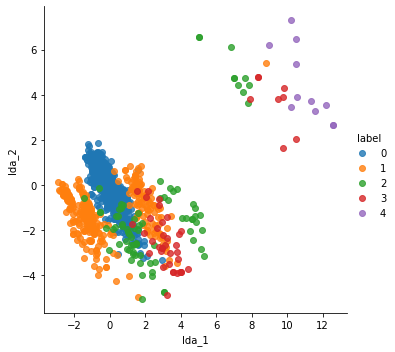

In [12]:
X_train_lda = pd.DataFrame(X_train_lda).loc[:,0:1]
X_train_lda = pd.concat((X_train_lda, y_label), axis = 1) #X_train_Ida와 y_label 데이터를 하나로 합치기
X_train_lda.columns = ['lda_1', 'lda_2', 'label']
X_train_lda

sns.lmplot(x = 'lda_1',y = 'lda_2',data = X_train_lda, hue = 'label', fit_reg = False)
plt.show()

## 우리가 원하는 정답 모양
## 캠페인 참여에서의 총 참여 횟수를 라벨값으로 둔 상태에서의 데이터 분포도

###K-means Clustering

클러스터링을 돌려 보는 데에 의의가 있기에, 파라미터 값 최적화보다는 각 알고리즘을 사용하면 결과가 어떻게 달라지는 지에 초점을 맞추어 살펴봅니다. 여러 번 시행해보면서 **자유롭게 파라미터를 정해주세요**.

**(직접 최적의 파라미터 값을 찾아서 설정하고 싶으시다면 훨씬 좋습니다! 해당 과제의 모든 코드는 기본 뼈대일 뿐입니다. 코드를 추가 또는 변경하셔도 좋습니다.)**

다른 x값들에 대해서도 캠페인 참여도, 즉 고객의 충실도를 잘 군집화할 수 있을까요? 클러스터링으로 결과를 확인해봅시다.



---





K-means를 이용하여 클러스터링 해봅시다.

In [64]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import KMeans

####elbow method

** 만약 elbow method를 사용해서 최적의 군집 수를 찾아본다면?

In [14]:
## 필요한 라이브러리를 임포트합니다.

from yellowbrick.cluster import KElbowVisualizer

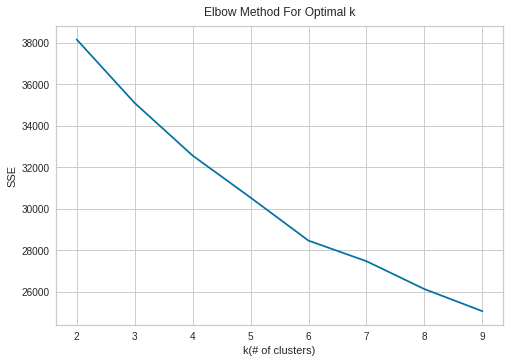

In [15]:
## SSE

sse = []
K = range(2, 10)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X_features_scaling)
  sse.append(km.inertia_)

plt.plot(K, sse)
plt.xlabel('k(# of clusters)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k', pad = 10)
plt.show()

내부 평가 지표로 SSE를 했을 때는 뚜렷한 elbow point가 나타나지 않습니다. 실루엣 계수를 사용해서 살펴 봅시다.

In [16]:
model = KMeans()

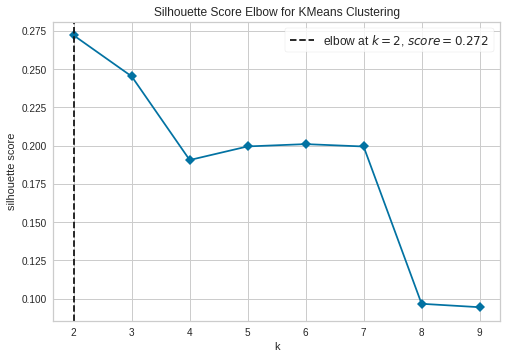

In [17]:
elbowvisualizer = KElbowVisualizer(model, k = (2,10), metric = 'silhouette', timings = False)

elbowvisualizer.fit(X_features_scaling)  
elbowvisualizer.show()

K-means에서는 k=2 에서 elbow point를 가집니다.
그러나 k=2일 경우 군집이 두 개밖에 형성되지 않기 때문에 당연하게도 성능이 올라갑니다. SSE나 실루엣 계수 두 지표에서 또 다른 elbow point로 잡아볼 여지가 있는, k=6으로 설정해봅시다.

In [18]:
## 클러스터 수는 6으로 설정하고, KMeans를 활용하여 예측된 y값을 만들어 봅시다.

km = KMeans(n_clusters = 6)

y_km = km.fit_predict(X_features_scaling)
y_km

array([0, 1, 0, ..., 5, 0, 1], dtype=int32)

In [19]:
X_train_lda['K_means'] = y_km

시각화를 해봅시다.

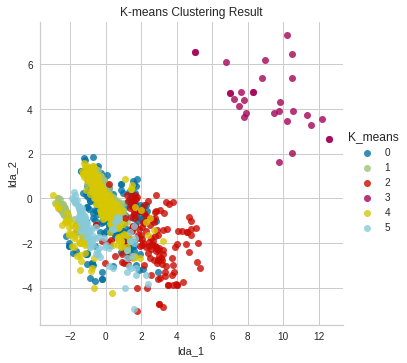

In [20]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

####클러스터링

차원 축소하고 난 뒤의 군집 수가 5였기 때문에, k=5로 설정하여 클러스터링을 해봅시다.

In [21]:
km = KMeans(n_clusters = 5)

y_km = km.fit_predict(X_features_scaling)
y_km

array([2, 4, 2, ..., 1, 2, 4], dtype=int32)

In [22]:
X_train_lda['K_means'] = y_km

####시각화

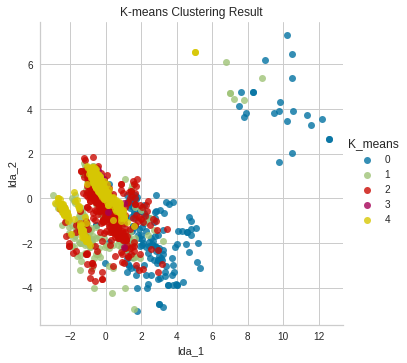

In [23]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

###Hierarchical Clustering

Agglomerative 방법을 이용하여 클러스터링 해봅시다.

####클러스터링

In [24]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import AgglomerativeClustering

In [25]:
## 클러스터 수는 5로 설정하고, Agglomerative를 활용하여 예측된 y값을 만들어 봅시다.

agghc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #와드연결법을 사용합니다.

y_agghc = agghc.fit_predict(X_features_scaling)
y_agghc

array([2, 3, 2, ..., 1, 2, 1])

In [26]:
X_train_lda['hierarchical'] = y_agghc

####시각화

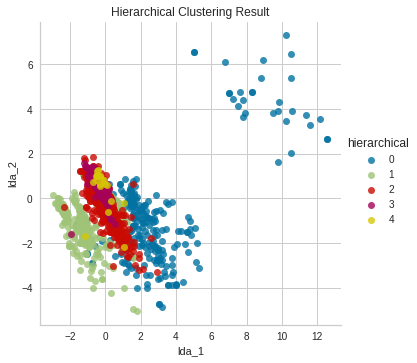

In [27]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'hierarchical', fit_reg = False)
plt.title('Hierarchical Clustering Result')
plt.show()

###DBSCAN

DBSCAN을 이용하여 클러스터링 해봅시다.

In [28]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import DBSCAN

####k-dist graph

만약 k-dist graph를 그려서 threshold point를 찾는다면?

In [29]:
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors

In [31]:
X_features_scaling.shape

(2216, 24)

2차원이 아닐 경우 minPts = 2 * dim 으로 설정하면 좋다는 다른 논문도 있습니다. 그러나 현재 클러스터링 결과가 좋지 않기 때문에, minPts=4로 설정해봅시다.

In [46]:
nb = NearestNeighbors(n_neighbors = 4).fit(X_features_scaling)

In [47]:
minPts = 4

In [48]:
#kneighbors([X, n_neighbors, return_distance]): Find the K-neighbors of a point.
distances, indices = nb.kneighbors(X_features_scaling)

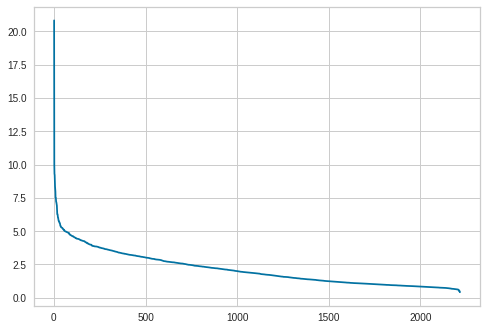

In [49]:
distance = sorted(distances[:, minPts-1], reverse = True)
plt.plot(list(range(1,2217)), distance)

첫번째 valley에서의 threshold point를 찾는다면, eps=5로 볼 수 있습니다.

In [50]:
## eps는 5, minPts는 4로 설정한 뒤 DBSCAN를 활용하여 예측된 y값을 만들어 봅시다.

dbscan = DBSCAN(eps = 5, min_samples = 4, metric = 'euclidean') #eps는 0-1

y_dbscan = dbscan.fit_predict(X_features_scaling)
y_dbscan

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
X_train_lda['dbscan'] = y_dbscan

시각화를 해봅시다.

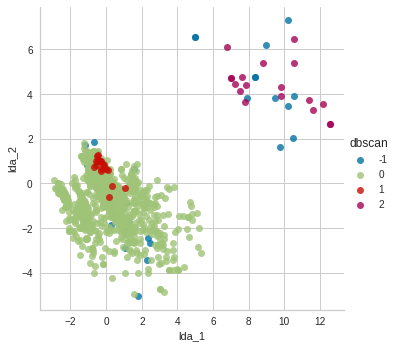

In [52]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'dbscan', fit_reg = False)
plt.show()

valley라고 볼 수 있는 eps=5로 설정한다면 성능은 좋을 수 있지만, 보통 eps는 1 이하의 값으로 설정합니다.

일반적으로 eps와 minPts를 설정해 클러스터링 해봅시다.

####클러스터링

In [56]:
dbscan = DBSCAN(eps = 0.05, min_samples = 3, metric = 'euclidean') #eps는 0-1

y_dbscan = dbscan.fit_predict(X_features_scaling)
y_dbscan

array([-1, -1, -1, ..., -1, -1, -1])

In [57]:
X_train_lda['dbscan'] = y_dbscan

####시각화

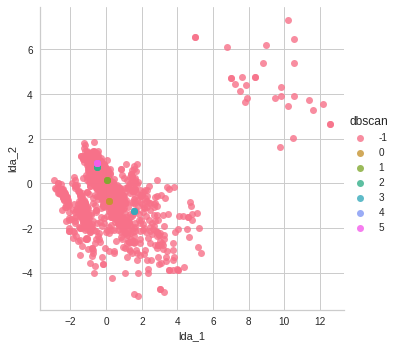

In [58]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'dbscan', fit_reg = False)
plt.show()

###Validation

실루엣 계수를 사용하여 각 클러스터링의 성능을 평가해봅시다.



---



(Q) 실루엣 계수로 평가하기 전에, 육안 상으로 어떠한 알고리즘의 성능이 제일 높아 보이며 어떠한 알고리즘의 성능이 제일 낮아 보이는지 의견을 적어주세요.

Hierarchical과 K-means는 성능이 비슷해 보이는 반면, DBSCAN은 대부분 데이터의 라벨값을 -1, 즉 noise로 설정했다. DBSCAN에서 확연하게 성능이 제일 낮아 보인다.



---



이제 실루엣 계수로 성능을 평가해 봅시다!

In [59]:
## 필요한 라이브러리를 임포트합니다.

import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

K-means Clustering의 실루엣 계수입니다.

In [61]:
coef_km = metrics.silhouette_score(X_features_scaling, y_km)
print('Silhouette score is {}.'.format(coef_km))

Silhouette score is 0.1993050231444298.


Hierarchical Clustering의 실루엣 계수입니다.

In [62]:
## Hierarchical Clustering

coef_hc = metrics.silhouette_score(X_features_scaling, y_agghc)
print('Silhouette score is {}.'.format(coef_hc))

Silhouette score is 0.17393367899599174.


DBSCAN의 실루엣 계수입니다.

In [63]:
## DBSCAN

coef_db = metrics.silhouette_score(X_features_scaling, y_dbscan)
print('Silhouette score is {}.'.format(coef_db))

Silhouette score is -0.3544157747163334.


(Q) 실루엣 계수를 기반으로, 클러스터링 알고리즘의 성능을 높은 순대로 적어주세요.

K-means > Hierarchical > DBSCAN

(Q) 클러스터링 결과에 대한 해석을 적어주세요. (참고로, 실루엣 계수는 -1에서 1 사이의 값을 가집니다.)

실루엣 계수의 값이 0.5 이상일 때 보통 클러스터링이 잘 되었다고 판단한다. 위의 세 알고리즘은 실루엣 계수가 모두 0.5 이하이기에 전반적으로 클러스터링이 잘 되지 않았다. DBSCAN의 경우 실루엣 계수가 음의 값이다. 즉, 클러스터부터 제대로 생성되지 않았다. 시각화 단계를 통해서도 클러스터링에 실패했음을 확인할 수 있다.


(Q) 마케팅 캠페인과 관련하여 도출할 수 있는 인사이트를 적어주세요.

마케팅 캠페인 참여 횟수를 기준으로 비교했는데, 참여 횟수가 많다는 것은 비교적 기업에 대한 충성도가 높은 고객이라고 생각할 수 있다. 충성도별 고객군을 파악할 수 있다면 차별화된 마케팅 전략을 적용할 수 있을 것이다. 그러나 클러스터링이 잘 되지 않았기 때문에 현재로서는 마케팅 캠페인을 공략할 타겟층을 정확하게 뽑아내는 것은 어렵다. 충성도별 고객군을 파악하려면 클러스터링이 아닌 다른 방법을 사용해야 할 것이다.